---
# Pandas Foundation
---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
movies = pd.read_csv('./movie.csv')
movies.head()

color      director_name  ...  aspect_ratio  movie_facebook_likes
0  Color      James Cameron  ...          1.78                 33000
1  Color     Gore Verbinski  ...          2.35                     0
2  Color         Sam Mendes  ...          2.35                 85000
3  Color  Christopher Nolan  ...          2.35                164000
4    NaN        Doug Walker  ...           NaN                     0

[5 rows x 28 columns]

In [4]:
movies.shape

(4916, 28)

In [5]:
movies.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

## Dissecting the anatomy of a DataFrame

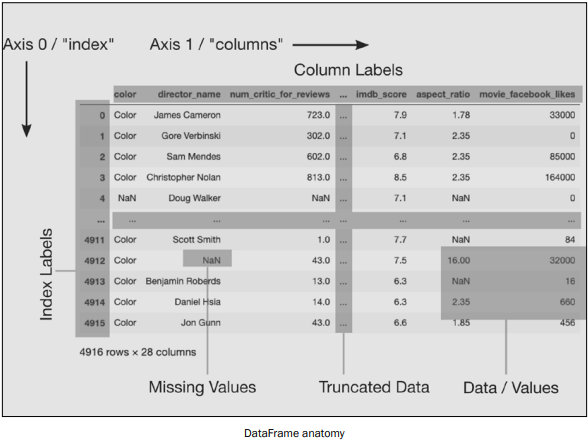

Use the DataFrame attributes index, columns, and values to assign the index, columns, and data to their own variables:

In [7]:
index = movies.index
index

RangeIndex(start=0, stop=4916, step=1)

In [8]:
column = movies.columns
column

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
data = movies.to_numpy()
data[:5]

array([['Color', 'James Cameron', 723.0, 178.0, 0.0, 855.0,
        'Joel David Moore', 1000.0, 760505847.0,
        'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar',
        886204, 4834, 'Wes Studi', 0.0,
        'avatar|future|marine|native|paraplegic',
        'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', 3054.0,
        'English', 'USA', 'PG-13', 237000000.0, 2009.0, 936.0, 7.9, 1.78,
        33000],
       ['Color', 'Gore Verbinski', 302.0, 169.0, 563.0, 1000.0,
        'Orlando Bloom', 40000.0, 309404152.0,
        'Action|Adventure|Fantasy', 'Johnny Depp',
        "Pirates of the Caribbean: At World's End", 471220, 48350,
        'Jack Davenport', 0.0,
        'goddess|marriage ceremony|marriage proposal|pirate|singapore',
        'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1', 1238.0,
        'English', 'USA', 'PG-13', 300000000.0, 2007.0, 5000.0, 7.1,
        2.35, 0],
       ['Color', 'Sam Mendes', 602.0, 148.0, 0.0, 161.0, 'Rory Kinnear',
       

Output the Python type of each DataFrame component

In [10]:
type(index)

pandas.core.indexes.range.RangeIndex

In [11]:
type(column)

pandas.core.indexes.base.Index

In [13]:
type(data), data.shape

(numpy.ndarray, (4916, 28))

The index and the columns are closely related. Both of them are subclasses of Index. This allows you to perform similar operations on both the index and the columns:

In [14]:
issubclass(pd.RangeIndex, pd.Index)

True

In [16]:
issubclass(column.__class__, pd.Index)

True

Most of pandas relies heavily on the ndarray. Beneath the index, columns, and
data are NumPy ndarrays. They could be considered the base object for pandas that many
other objects are built upon.

In [18]:
data = movies.values
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [19]:
data = movies.to_numpy()
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [20]:
index.to_numpy()

array([   0,    1,    2, ..., 4913, 4914, 4915])

In [21]:
column.to_numpy()

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

---
# Understanding data types
---
We display the data type of each column in a DataFrame. After ingest data, it is crucial to know the type of data held in each column as it fundamentally changes the kind of operations that are possible with it.

**How to do it**:  
Use the `.dtypes` attribute to display each column name along with its data type.

In [22]:
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Use the `.value_counts` method to return the counts of each data type

In [23]:
movies.dtypes.value_counts()

float64    13
object     12
int64       3
dtype: int64

Look at the `.info` method

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

Typically, when a column is of the object data type, it signals that the entire column is strings.When you load CSV files and string columns are missing values, pandas will stick in a NaN (float) for that cell.
So the column might have both object and float (missing) values in it. 
The .dtypes attribute will show the column as an object (or O on the series). It will not show it as a mixed type column (that contains both strings and floats):

In [27]:
mixte = ['Paul', np.nan, 'Eve']
mixte_serie = pd.Series(mixte)
mixte_serie

0    Paul
1     NaN
2     Eve
dtype: object

In [28]:
mixte_serie.dtype

dtype('O')

## Selecting a column
Selected a single column from a DataFrame returns a Series (that has the same index as the
DataFrame).

In [29]:
# Pass a column name as a string to the indexing operator to select a Series 
# of data
movies['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [30]:
# Alternatively, may use attribute access to accomplish the same task
movies.director_name

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [31]:
# We can also index off of the .loc and .iloc attributes to pull out a Series. 
# The former allows us to pull out by column name, while the latter by position.
movies.loc[:, ['director_name']]

director_name
0         James Cameron
1        Gore Verbinski
2            Sam Mendes
3     Christopher Nolan
4           Doug Walker
...                 ...
4911        Scott Smith
4912                NaN
4913   Benjamin Roberds
4914        Daniel Hsia
4915           Jon Gunn

[4916 rows x 1 columns]

In [32]:
movies.iloc[:, [1]]

director_name
0         James Cameron
1        Gore Verbinski
2            Sam Mendes
3     Christopher Nolan
4           Doug Walker
...                 ...
4911        Scott Smith
4912                NaN
4913   Benjamin Roberds
4914        Daniel Hsia
4915           Jon Gunn

[4916 rows x 1 columns]

In [34]:
s1 = movies.loc[:, 'director_name']
s1

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [35]:
# Serie index
s1.index

RangeIndex(start=0, stop=4916, step=1)

In [36]:
# data type
s1.dtype

dtype('O')

In [37]:
# length
s1.size

4916

In [38]:
# name
s1.name

'director_name'

In [39]:
# Verify that the output is a Series
type(s1)

pandas.core.series.Series

Note that even though the type is reported as object, because there are missing values, the Series has both floats and strings in it.

In [43]:
s1.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

## Calling Series methods
Both Series and DataFrames have a tremendous amount of power. We can use the built-in
dir function to uncover all the attributes and methods of a Series. In the following code, we
also show the number of attributes and methods common to both Series and DataFrames.
Both of these objects share the vast majority of attribute and method names

In [47]:
s_attribute_mth = set(dir(pd.Series))
print('Series attribute methods:', len(s_attribute_mth))

Series attribute methods: 425


In [48]:
df_attribute_mth = set(dir(pd.DataFrame))
print('Dataframe attribute methods:', len(df_attribute_mth))

Dataframe attribute methods: 427


In [51]:
common = s_attribute_mth & df_attribute_mth
print('Common methods btw Series and Dataframes: ', len(common))

Common methods btw Series and Dataframes:  372


In [52]:
# Select two Series with different data types
director = movies['director_name']
fb_likes = movies['actor_1_facebook_likes']

In [53]:
print(director.dtype)
print(fb_likes.dtype)

object
float64


In [54]:
# View some of the director serie data
director.sample(n=30, random_state=0)

3327              Will Gluck
1013              Doug Liman
3561        Patrick Stettner
1708          Laurent Tirard
873             Karyn Kusama
1332        Francis Lawrence
3989        Alfred Hitchcock
304          Martin Scorsese
601               Gary Shore
1826    Richard Attenborough
3233            Danny Leiner
405        Steven Soderbergh
1259           Roger Michell
716             F. Gary Gray
3994          Richard Brooks
130          Kenneth Branagh
4271         Morgan Spurlock
4052            Paolo Monico
3429              Ethan Coen
2478            Trent Cooper
1706          Andrew Dominik
3391              Jeta Amata
861                Paul King
4620         Patrick Creadon
1091             Jesse Dylan
1581          Steve Oedekerk
1702             Steve Boyum
1109            Harold Ramis
3948         Justin Kerrigan
3675          Barry Levinson
Name: director_name, dtype: object

In [55]:
# View some of the fb likes serie data
fb_likes.sample(n=30, random_state=0)


3327    15000.0
1013     6000.0
3561      944.0
1708      295.0
873      9000.0
1332    21000.0
3989       18.0
304     29000.0
601      3000.0
1826      385.0
3233      982.0
405     14000.0
1259      293.0
716     26000.0
3994      556.0
130     26000.0
4271    16000.0
4052     1000.0
3429      816.0
2478      690.0
1706    11000.0
3391      262.0
861       838.0
4620      196.0
1091    14000.0
1581      531.0
1702    17000.0
1109      905.0
3948      798.0
3675      801.0
Name: actor_1_facebook_likes, dtype: float64

The data type of the Series usually determines which of the methods will be the most
useful. For instance, one of the most useful methods for the *object* data type Series
is `.value_counts`, which calculates the frequencies

In [56]:
director.value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        16
                    ..
Joshua Seftel        1
Malcolm Goodwin      1
Floyd Mutrux         1
Chris Gorak          1
Jason Alexander      1
Name: director_name, Length: 2397, dtype: int64

In [89]:
director.value_counts(normalize=True)

Steven Spielberg    0.005401
Woody Allen         0.004570
Martin Scorsese     0.004155
Clint Eastwood      0.004155
Ridley Scott        0.003324
                      ...   
Joshua Seftel       0.000208
Malcolm Goodwin     0.000208
Floyd Mutrux        0.000208
Chris Gorak         0.000208
Jason Alexander     0.000208
Name: director_name, Length: 2397, dtype: float64

The `.value_counts` method is typically more useful for Series with object data
types but can occasionally provide insight into numeric Series as well. Used with fb_
likes, it appears that higher numbers have been rounded to the nearest thousand
as it is unlikely that so many movies received exactly 1,000 likes

In [60]:
fb_likes.value_counts()

1000.0     436
11000.0    206
2000.0     189
3000.0     150
12000.0    131
          ... 
362.0        1
216.0        1
859.0        1
225.0        1
334.0        1
Name: actor_1_facebook_likes, Length: 877, dtype: int64

Counting the number of elements in the Series may be done with the `.size` or `.shape` attribute or the built-in `len` function. 
The `.unique` method will return a NumPy array with the unique values

In [61]:
director.size

4916

In [63]:
director.shape[0]

4916

In [64]:
len(director)

4916

In [69]:
director.unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'Scott Smith', 'Benjamin Roberds', 'Daniel Hsia'], dtype=object)

Additionally, there is the `.count` method, which doesn't return the count of items, but the number of non-missing values

In [70]:
director.count()

4814

Basic summary statistics are provided with `.min`, `.max`, `.mean`, 
`.median`, and `.std`:

In [74]:
fb_likes.min()

0.0

In [75]:
fb_likes.max()

640000.0

In [76]:
fb_likes.mean()

6494.488490527602

In [77]:
fb_likes.median()

982.0

In [78]:
fb_likes.std()

15106.986883848309

may use the `.describe` method to return both the summary
statistics and a few of the quantiles at once. When `.describe` is used with an object data type column, a completely different output is returned

In [79]:
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [80]:
director.describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

The `.quantile` method calculates the quantile of numeric data. Note that if you
pass in a **scaler**, you will get **scalar** output, but if you pass in a **list**, the output is
a **pandas Series**:

In [81]:
fb_likes.quantile(.25)

607.0

In [84]:
brn = [.25, .5, .75, .95]
fb_likes_brn = fb_likes.quantile(brn)
fb_likes_brn

0.25      607.0
0.50      982.0
0.75    11000.0
0.95    23000.0
Name: actor_1_facebook_likes, dtype: float64

In [85]:
type(fb_likes_brn)

pandas.core.series.Series

## Missing values

In [87]:
fb_likes.isnull().sum()

7

In [88]:
director.isnull().sum()

102

In [90]:
# hasnans
director.hasnans

True

In [92]:
director.isna().sum()

102

In [93]:
director.isnull().sum()

102

In [94]:
director.notna().sum()

4814